# Machine Learning Foundation

## Course 3, Part a: Logistic Regression LAB

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

In [3]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
os.chdir('data')



FileNotFoundError: [WinError 2] The system cannot find the file specified: 'data'

In [2]:
from colorsetup import colors, palette
sns.set_palette(palette)

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [3]:
### BEGIN SOLUTION
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [4]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [5]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [6]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [7]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [8]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)
### END SOLUTION

ModuleNotFoundError: No module named 'sklearn'

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [10]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

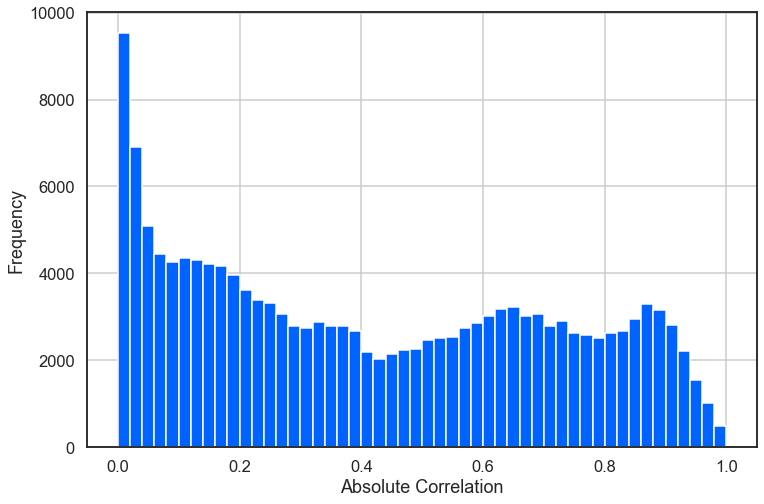

In [12]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [13]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

feature1                    feature2  correlation  \
156894  fBodyBodyGyroJerkMag-mean()  fBodyBodyGyroJerkMag-sma()     1.000000   
93902             tBodyAccMag-sma()        tGravityAccMag-sma()     1.000000   
101139       tBodyAccJerkMag-mean()       tBodyAccJerkMag-sma()     1.000000   
96706         tGravityAccMag-mean()        tGravityAccMag-sma()     1.000000   
94257          tBodyAccMag-energy()     tGravityAccMag-energy()     1.000000   
...                             ...                         ...          ...   
22657          tGravityAcc-mean()-Y        angle(Y,gravityMean)    -0.993425   
39225     tGravityAcc-arCoeff()-Z,3   tGravityAcc-arCoeff()-Z,4    -0.994267   
38739     tGravityAcc-arCoeff()-Z,2   tGravityAcc-arCoeff()-Z,3    -0.994628   
23176          tGravityAcc-mean()-Z        angle(Z,gravityMean)    -0.994764   
38252     tGravityAcc-arCoeff()-Z,1   tGravityAcc-arCoeff()-Z,2    -0.995195   

        abs_correlation  
156894         1.000000  
93902          1.000000  
101139         1.000000  
96706          1.000000  
94257          1.000000  
...                 ...  
22657          0.993425  
39225          0.994267  
38739          0.994628  
23176          0.994764  
38252          0.995195  

[22815 rows x 4 columns]

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [26]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

ModuleNotFoundError: No module named 'sklearn'

In [14]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [15]:
y_test.value_counts(normalize=True)
### END SOLUTION

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [16]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [17]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [18]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

## Question 5

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [19]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
300  0.168280 -0.322430  0.210832  0.309352 -0.094829  0.201557  0.144484   
202  0.082573  0.047831 -0.040873 -0.829971  0.545193 -0.552313  0.000000   
82  -0.020494 -0.302219  0.327782 -0.026389  0.114641 -0.302976  0.000000   
99  -0.074388 -0.423967 -0.406701 -0.277640 -0.146864  0.232009 -0.018998   
403 -0.027296  0.057664 -0.029316  0.078502  0.115030 -0.264176  0.000000   
372 -0.112010 -0.361619  0.375732 -0.537151 -0.178224 -0.196583  0.000000   
378 -0.077083 -0.157725  0.478697  0.676634 -0.087373 -0.029797  0.000000   
207  0.086239  0.303737 -0.041841 -0.098603  0.069837 -0.896923  0.015687   
344 -0.060251 -0.261175 -0.197222  0.006029  0.085647  0.168273  0.000000   
38   0.272909 -0.783830  0.870074  0.394160 -0.290467  0.380146  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
300 -0.669591  0.000000  0.506612  0.000000  0.101505  0.414784 -1.784797   
202  0.000000  0.000000 -0.205237  0.323133 -1.328605  0.158920  0.165514   
82  -1.161182  1.297800  0.000000  0.000000 -0.034165 -0.020849 -1.204030   
99   0.000000 -0.178080  0.000000  0.000000 -0.080299 -0.123530 -1.683292   
403  0.000000  0.000000  0.000000  0.000000 -0.353452 -0.064217 -0.143165   
372  0.000000  0.000000 -0.854805  0.000000  0.102722 -0.186845 -0.076829   
378  0.000000  0.528268  0.938550  0.000000  0.057714 -0.201868 -2.441419   
207  0.000000  0.000000  0.000000  0.000000 -2.461469  0.158578  2.226679   
344  0.000000  0.000000  0.000000  0.000000  0.000000 -0.104829 -0.973849   
38  -1.131384  1.427696  0.000000 -0.223162  0.937361  0.640742 -1.714208   

                                             
            2         3         4         5  
300  0.367451  0.847907  0.008994  0.198165  
202 -0.116706 -1.927798  0.966795 -2.063254  
82   0.686416 -0.112771  0.317425 -0.451990  
99  -0.518548 -0.853724 -0.432684  0.289871  
403 -0.031474 -0.017490  0.334060 -0.571423  
372  0.333185 -1.575284 -0.533806  1.130942  
378  0.937631  1.385272 -0.008617  0.283636  
207 -0.178350  0.001736  0.106955 -3.702897  
344 -0.228070 -0.091084  0.063868  0.822321  
38   1.173830  0.807363 -0.800153  1.619275

Prepare six separate plots for each of the multi-class coefficients.

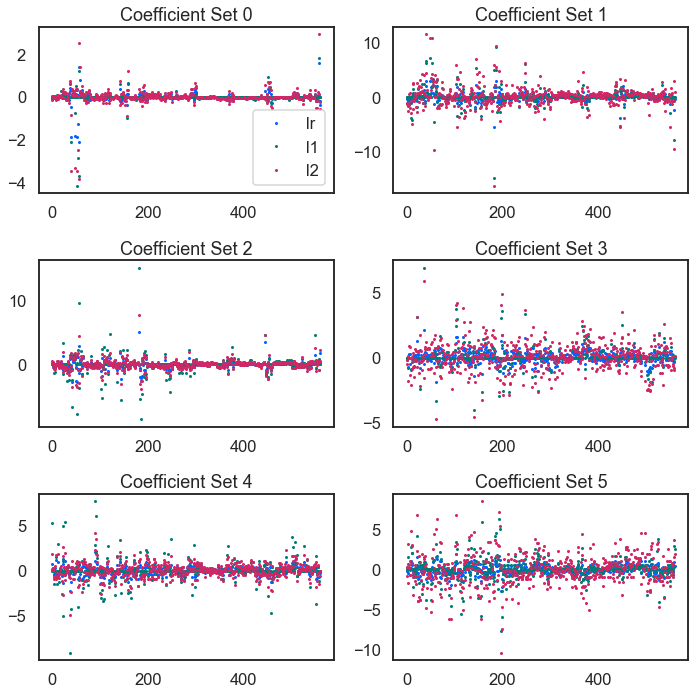

In [20]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()
### END SOLUTION

## Question 6

* Predict and store the class for each model.
* Store the probability for the predicted class for each model. 

In [21]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

lr  l1  l2
0   3   3   3
1   5   5   5
2   3   3   3
3   1   1   1
4   0   0   0

In [22]:
y_prob.head()
### END SOLUTION

lr        l1        l2
0  0.998939  0.998866  0.999758
1  0.988165  0.999743  0.999477
2  0.987592  0.995647  0.999696
3  0.981381  0.999125  0.994338
4  0.998277  0.999919  0.999997

## Question 7

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [23]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [24]:
metrics
### END SOLUTION

lr        l1        l2
precision  0.984144  0.983835  0.983824
recall     0.984142  0.983819  0.983819
fscore     0.984143  0.983815  0.983819
accuracy   0.984142  0.983819  0.983819
auc        0.990384  0.990144  0.990165

## Question 8

Display or plot the confusion matrix for each model.

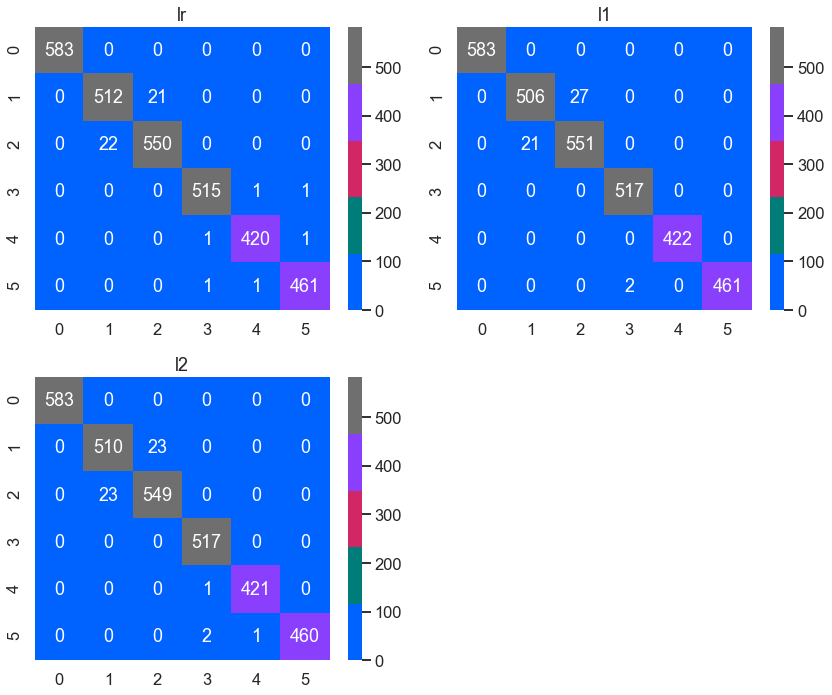

In [25]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors);
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

---
### Machine Learning Foundation (C) 2020 IBM Corporation